In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import DMsimulator as DMsim
from DMoptimize import Optimize

In [2]:

#########* Constants and fixed parameters of the model
const_dict = {
        "F0": 1.5e15,           # cm^-2
        "S0": 3e13,             # cm^-2
        
        "R": 0.00831442,        # kJ/mol*K
        "kBoltz": 1.380649e-23, # J/K
}

#########* Steric factors reactions
# steric_dict = {
#         ###* Atomic oxygen
#         "SF_O_F": 1.0, "SF_O_S": 1.0, "SF_O_SO": 1.0, "SF_O_FO": 1.0,
#         "SF_FO_S": 1.0, "SF_FO_SO": 1.0, "SF_FO_FO": 1.0, "SF_FO": 1.0,
        
#         ###* Molecular oxygen
#         "SF_O2_F": 1.0, "SF_O2_FO": 1.0, "SF_O2_FO2": 1.0, "SF_O_FO2": 1.0,
#         "SF_FO2_FO": 1.0, "SF_FO_FO2": 1.0, "SF_FO2": 1.0,
        
#         ###* Metastable species
#         "SF_O2fast_SO": 0.0, "SF_Ofast_SO": 0.0, "SF_O2fast_S": 0.0,  "SF_Ofast_S": 0.0,
#         "SF_Ofast_Sdb": 0.0, "SF_Ofast_SOdb": 0.0, "SF_O2fast_Sdb": 0.0, "SF_O2fast_SOdb": 0.0,
#         "SF_O_Sdb": 0.0, "SF_O_SOdb": 0.0, "SF_FO_SOdb": 0.0, "SF_FO_Sdb": 0.0,
# }


steric_dict = {
        ###* Atomic oxygen
        "SF_O_F": 1.0, "SF_O_S": 1.0, "SF_O_SO": 1.0, "SF_O_FO": 1.0,
        "SF_FO_S": 1.0, "SF_FO_SO": 1.0, "SF_FO_FO": 1.0, "SF_FO": 1.0,
        
        ###* Molecular oxygen
        "SF_O2_F": 1.0, "SF_O2_FO": 1.0, "SF_O2_FO2": 1.0, "SF_O_FO2": 1.0,
        "SF_FO2_FO": 1.0, "SF_FO_FO2": 1.0, "SF_FO2": 1.0,
        
        ###* Metastable species
        "SF_O2fast_SO": 1.0, "SF_Ofast_SO": 1.0, "SF_O2fast_S": 1.0,  "SF_Ofast_S": 1.0,
        "SF_Ofast_Sdb": 1.0, "SF_Ofast_SOdb": 1.0, "SF_O2fast_Sdb": 1.0, "SF_O2fast_SOdb": 1.0,
        "SF_O_Sdb": 1.0, "SF_O_SOdb": 1.0, "SF_FO_SOdb": 1.0, "SF_FO_Sdb": 1.0,
}

#########* Energy barriers  --  Based Model
energy_dict = { # kJ/mol and s^-1
        "E_O_F": 0.0, "E_O_S": 0.0, "E_O_SO": 15.0, "E_O_FO": 0.0, 
        "E_FO_SO": 20.0, "E_FO_FO":0.0, "E_di_O": 15.0, "E_de_O": 30.0,
        
        "E_O2_F": 0.0, "E_O2_FO": 0.0, "E_O2_FO2": 0.0, "E_O_FO2": 0.0, 
        "E_FO2_FO": 0.0, "E_FO_FO2": 0.0, "E_di_O2": 15.0, "E_de_O2": 17.5,
        
        "E_O2fast_SO": 0.0, "E_O2fast_S": 0.0, "E_O2fast_SOdb": 0.0, "E_O2fast_Sdb": 0.0, "E_Ofast_Sdb": 0.0,
        "E_Ofast_SOdb": 0.0, "E_O_Sdb": 0.0, "E_O_SOdb": 0.0, "E_F_SOdb": 0.0, "E_FO_SOdb": 0.0,
        "ED_db": 14.999,
        
        "nu_D": 1.0e13, "nu_d": 1.0e15,
        "Emin": 2.90, # eV
        "Ealpha": 3400.0, # K
}

file_input_data = "Experimental_data_TD.hdf5"


In [3]:

###! Values
# A = 0.10521532
# B = 0.00013951

class MyOptimize(Optimize):
    
    def modify_energy_dict(self, params, counter):
        
        Ealpha, Emin, ED_db  = params
        Tw = self.input_data_dict[counter]['Tw']
        R = self.const_dict['R']
        
        # A = 0.10521532
        # B = 0.00013951
        
        A = 2.74332762e-03
        B = 6.23703570e-04 
        Energy = 1.68496853e+01
        
        nu_d = 1e15 * (A + B * np.exp(Energy / (R * Tw)))
        
        self.energy_dict_base['nu_d'] = nu_d
        self.energy_dict_base['Ealpha'] = Ealpha
        self.energy_dict_base['Emin'] = Emin
        self.energy_dict_base['ED_db'] = ED_db
        
        return self.energy_dict_base
        

In [4]:
loss_func = lambda x: x**2
global_bounds = [(2500.0, 3500.0), (2.7, 4.0), (10.0, 20.0)]

input_dim = global_bounds.__len__()

opt = MyOptimize(const_dict, steric_dict, energy_dict, file_input_data, loss_func, input_dim=input_dim, max_time=15)


config_opt_dict = {
    "bounds": global_bounds,
    "nb_de_calls": 3, # 5
    "de_maxiter": 10,
    "top_k": 3,
    "local_attempts": 3,
    "epsilon_local": 1e-2
}



In [5]:

#### Call the optimization routine

best_local, best_local_loss = opt.hybrid_search(config_opt_dict)



Loss:  0.10878461667925785 Params:  [3151.95886197    3.68643224   11.76182017]
Loss:  0.12330941281811343 Params:  [2535.8956341     3.55800283   13.69781585]
Loss:  0.12213900313549417 Params:  [2577.25946587    3.33780515   17.24140549]
Loss:  0.08789942482502755 Params:  [3.48091558e+03 3.43067351e+00 1.30876018e+01]
Loss:  0.0896479176531911 Params:  [3.23838436e+03 2.97258755e+00 1.44045227e+01]
Loss:  0.12006334210256611 Params:  [2734.58569346    3.46676603   10.86846426]
Loss:  0.11314090958574352 Params:  [2849.83098204    3.04634846   11.91549933]
Loss:  0.12244903579605522 Params:  [2696.7151956     3.78423105   18.46388639]
Loss:  0.09197310138001963 Params:  [3.29493551e+03 3.24527902e+00 1.56477092e+01]
Loss:  0.12117246364407061 Params:  [2757.9976961     3.68643224   18.87002619]
Loss:  0.11085943345904013 Params:  [3073.25345732    3.55800283   13.69781585]
Loss:  0.0905905418053602 Params:  [3.22636285e+03 2.97847236e+00 1.54790893e+01]
Loss:  0.11841116176715161 Par

In [1]:

loss_initial = opt.functional_loss(np.array([3400.0, 2.9, 15.0]))
# loss_paper = opt.functional_loss(np.array([0.01634, 1.67e-4]))

loss_final = opt.functional_loss(best_local)

# print("Gain: ", np.abs(loss_paper - loss_final)/loss_paper*100)

print("Nb of calls: ", opt.nb_calls)


print("Initial loss: ", loss_initial)
# print("Paper loss: ", loss_paper)
print("Final loss: ", loss_final)

NameError: name 'opt' is not defined

In [7]:
# Loss:  0.08386405929975412 Params:  [3.26673523e+03 2.70000000e+00 1.00000000e+01



# Loss:  6.967500987552882e-06 Params:  [0.06815468, 0.00013756]


# Initial loss:  0.6004431685912233
# Paper loss:  0.11493457128292281
# Final loss:  0.1006244818002997
# Gain:  12.450639805665961
# Nb of calls:  1358

### best_local:  [0.10519756 0.00013952]


# Loss:  0.10062448228726699 Params:  [0.10518383 0.00013952]
# Gain:  12.45063938197509
# Nb of calls:  1780
# Initial loss:  0.6004431685912233
# Paper loss:  0.11493457128292281
# Final loss:  0.10062448228726699


# best_local:  [2.94209882e+03 2.00000000e+00 5.00000000e+00]
# Nb of calls:  1869
# Final loss:  0.05536763170672343


# Loss:  0.056589270199310676 Params:  [2.82161823e+03 1.69723056e+00 3.24948714e+00]

best_local:  [3.26673412e+03 2.70000000e+00 1.00000000e+01]


In [8]:
#### sensibility analysis

perturbation = np.linspace(-1.0, 1.0, 30)
costs = []
for i in range(len(perturbation)):
    costs_aux = []
    for j in range(len(best_local)):
        params = best_local.copy()
        params[j] += 0.1*params[j]*perturbation[i]
        cost = opt.functional_loss(params)
        costs_aux.append(cost)
    costs.append(costs_aux)

costs = np.array(costs)

Loss:  0.10211243612294793 Params:  [2.94006071e+03 2.70000000e+00 1.00000000e+01]
Loss:  0.08354356649464749 Params:  [3.26673412e+03 2.70000000e+00 9.06896552e+00]
Loss:  0.08566759936171216 Params:  [3.26673412e+03 2.48586207e+00 1.00000000e+01]
Loss:  0.09437210090258313 Params:  [3.05270671e+03 2.70000000e+00 1.00000000e+01]
Loss:  0.08366274846035802 Params:  [3.26673412e+03 2.70000000e+00 9.41379310e+00]
Loss:  0.08426514042905943 Params:  [3.26673412e+03 2.57896552e+00 1.00000000e+01]
Loss:  0.08684768678735574 Params:  [3.16535272e+03 2.70000000e+00 1.00000000e+01]
Loss:  0.08378223555101189 Params:  [3.26673412e+03 2.70000000e+00 9.75862069e+00]
Loss:  0.08383661177576311 Params:  [3.26673412e+03 2.67206897e+00 1.00000000e+01]
Loss:  0.08404000415723048 Params:  [3.27799872e+03 2.70000000e+00 1.00000000e+01]
Loss:  0.08389838490014856 Params:  [3.26673412e+03 2.70000000e+00 1.01034483e+01]
Loss:  0.08416222967429908 Params:  [3.26673412e+03 2.76517241e+00 1.00000000e+01]
Loss

Text(0, 0.5, 'Avg Loss')

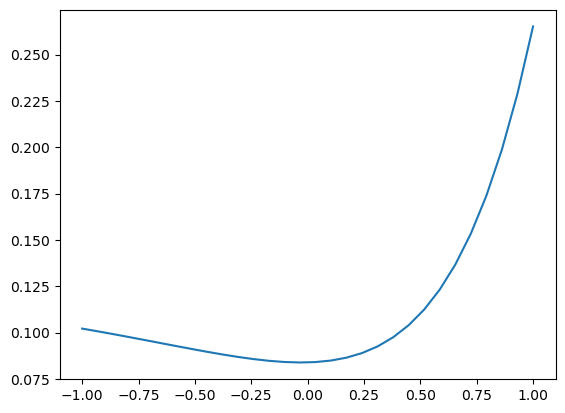

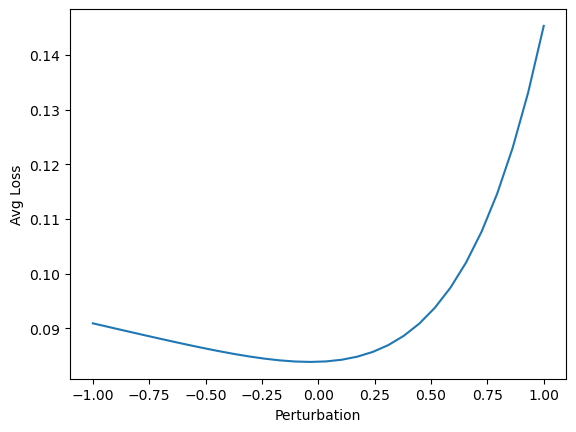

In [9]:
costs = np.array(costs)
# print(costs)

plt.figure()
plt.plot(perturbation, costs[:, 0], label='A')

plt.figure()
# plt.plot(perturbation, costs[:, 1], label='B')
plt.plot(perturbation, np.mean(costs, axis=1), label='Total')
plt.xlabel('Perturbation')
plt.ylabel('Avg Loss')
# plt.savefig("figures/sensibility_analysis.png")

In [10]:
### remove very large values

surf_buffer = opt.buffer.copy()
# surf_buffer[surf_buffer[:, 0] > 1.0] = np.nan

Text(0, 0.5, 'Loss')

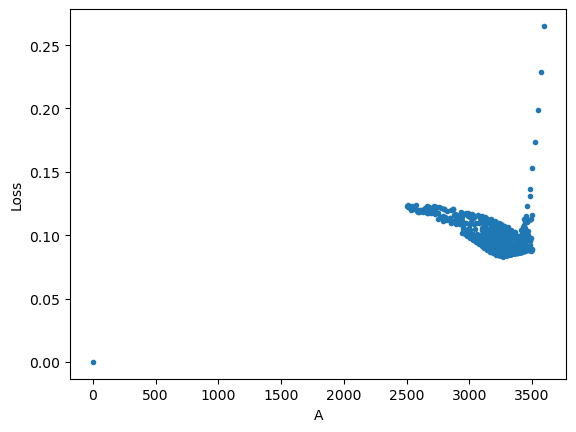

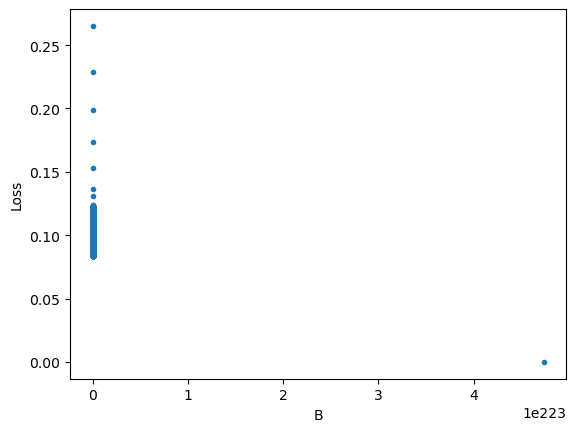

In [11]:


plt.figure()
plt.plot(surf_buffer[:, 1], surf_buffer[:, 0], '.')
plt.xlabel('A')
plt.ylabel('Loss')



plt.figure()
plt.plot(surf_buffer[:, 2], surf_buffer[:, 0], '.')
plt.xlabel('B')
plt.ylabel('Loss')

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.tri as tri

# surf_buffer_trig = surf_buffer[~np.isnan(surf_buffer).any(axis=1)]

# x = surf_buffer_trig[:, 1]
# y = surf_buffer_trig[:, 2]
# z = surf_buffer_trig[:, 0]
# # Create triangulation
# triang = tri.Triangulation(x, y)

# # Plot using tripcolor
# plt.figure()
# plt.tripcolor(triang, z, shading='gouraud', cmap='viridis')
# plt.colorbar(label='Loss')
# plt.xlabel('A')
# plt.ylabel('B')
# plt.title('Loss surface')
# # plt.axis('equal')
# plt.tight_layout()
# plt.show()


In [13]:

# surf_buffer_trig2 = opt.buffer.copy()
# surf_buffer_trig2[surf_buffer_trig2[:, 0] > 2.0, 0] = 2.0


# x = surf_buffer_trig2[:, 1]
# y = surf_buffer_trig2[:, 2]
# z = surf_buffer_trig2[:, 0]

# xmin, xmax = 3e3, np.max(x)
# ymin, ymax = 2.6, np.max(y)

# mask = (x >= xmin) & (x <= xmax) & (y >= ymin) & (y <= ymax)

# # Apply mask
# x_sub = x[mask]
# y_sub = y[mask]
# z_sub = z[mask]


# # Create triangulation
# triang_sub = tri.Triangulation(x_sub, y_sub)
# triangles = triang_sub.triangles
# xtri = x_sub[triangles].mean(axis=1)
# ytri = y_sub[triangles].mean(axis=1)

# tri_mask = (xtri < xmin) | (xtri > xmax) | (ytri < ymin) | (ytri > ymax)
# triang_sub.set_mask(tri_mask)


# plt.figure()
# plt.tripcolor(triang_sub, z_sub, shading='gouraud', cmap='viridis')
# plt.colorbar(label='Loss')
# plt.xlabel('A')
# plt.ylabel('B')
# plt.title('Loss surface')
# # plt.axis('equal')
# # plt.tight_layout()
# plt.gca().set_aspect('auto')
# plt.show()